In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim

In [9]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [10]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) 
          for img, label in cifar10 
          if label in [0, 2]]

cifar2_val = [(img, label_map[label]) 
              for img, label in cifar10_val 
              if label in [0, 2]]

In [32]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, n_out),
    nn.LogSoftmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8628641..2.029448].


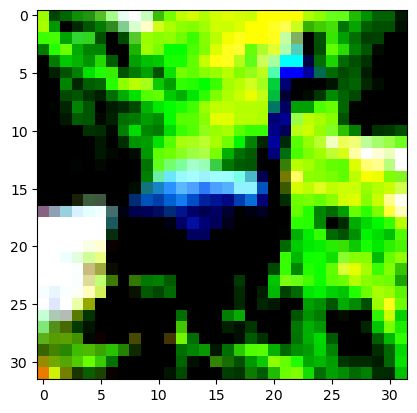

In [18]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [19]:
img_batch = img.view(-1).unsqueeze(0)

In [20]:
out = model(img_batch)
out

tensor([[-0.7489, -0.6404]], grad_fn=<LogSoftmaxBackward0>)

In [21]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [22]:
loss = nn.NLLLoss()

In [23]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6404, grad_fn=<NllLossBackward0>)

In [26]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [33]:
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 50

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.451041
Epoch: 1, Loss: 0.550624
Epoch: 2, Loss: 0.451917
Epoch: 3, Loss: 0.534328
Epoch: 4, Loss: 0.387366
Epoch: 5, Loss: 0.630054
Epoch: 6, Loss: 0.334615
Epoch: 7, Loss: 0.438803
Epoch: 8, Loss: 0.434042
Epoch: 9, Loss: 0.410462
Epoch: 10, Loss: 0.482157
Epoch: 11, Loss: 0.462272
Epoch: 12, Loss: 0.349065
Epoch: 13, Loss: 0.394666
Epoch: 14, Loss: 0.428704
Epoch: 15, Loss: 0.491858
Epoch: 16, Loss: 0.360572
Epoch: 17, Loss: 0.152818
Epoch: 18, Loss: 0.485033
Epoch: 19, Loss: 0.435704
Epoch: 20, Loss: 0.193811
Epoch: 21, Loss: 0.305395
Epoch: 22, Loss: 0.186039
Epoch: 23, Loss: 0.188051
Epoch: 24, Loss: 0.395289
Epoch: 25, Loss: 0.224212
Epoch: 26, Loss: 0.337743
Epoch: 27, Loss: 0.317162
Epoch: 28, Loss: 0.174931
Epoch: 29, Loss: 0.391648
Epoch: 30, Loss: 0.161552
Epoch: 31, Loss: 0.098255
Epoch: 32, Loss: 0.061663
Epoch: 33, Loss: 0.143617
Epoch: 34, Loss: 0.066569
Epoch: 35, Loss: 0.446866
Epoch: 36, Loss: 0.128623
Epoch: 37, Loss: 1.197982
Epoch: 38, Loss: 0.240

In [34]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
    print("Accuracy: %f", correct / total)

Accuracy: %f 0.821
